In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Data Visualization

In [6]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

<AxesSubplot:xlabel='satisfaction_level', ylabel='left'>

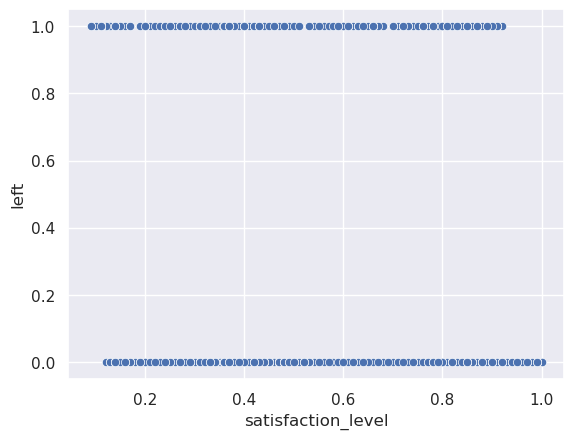

In [5]:
sns.scatterplot(x='satisfaction_level',y='left',data=df)

In [24]:
left_by_department = df.groupby('Department').left.sum()
left_by_department.sort_index()

Department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64

In [27]:
total_by_dep = df.Department.value_counts().sort_index()
total_by_dep

IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: Department, dtype: int64

In [49]:
percentange_left = (left_by_department/total_by_dep)*100
percentange_left = percentange_left.sort_values()

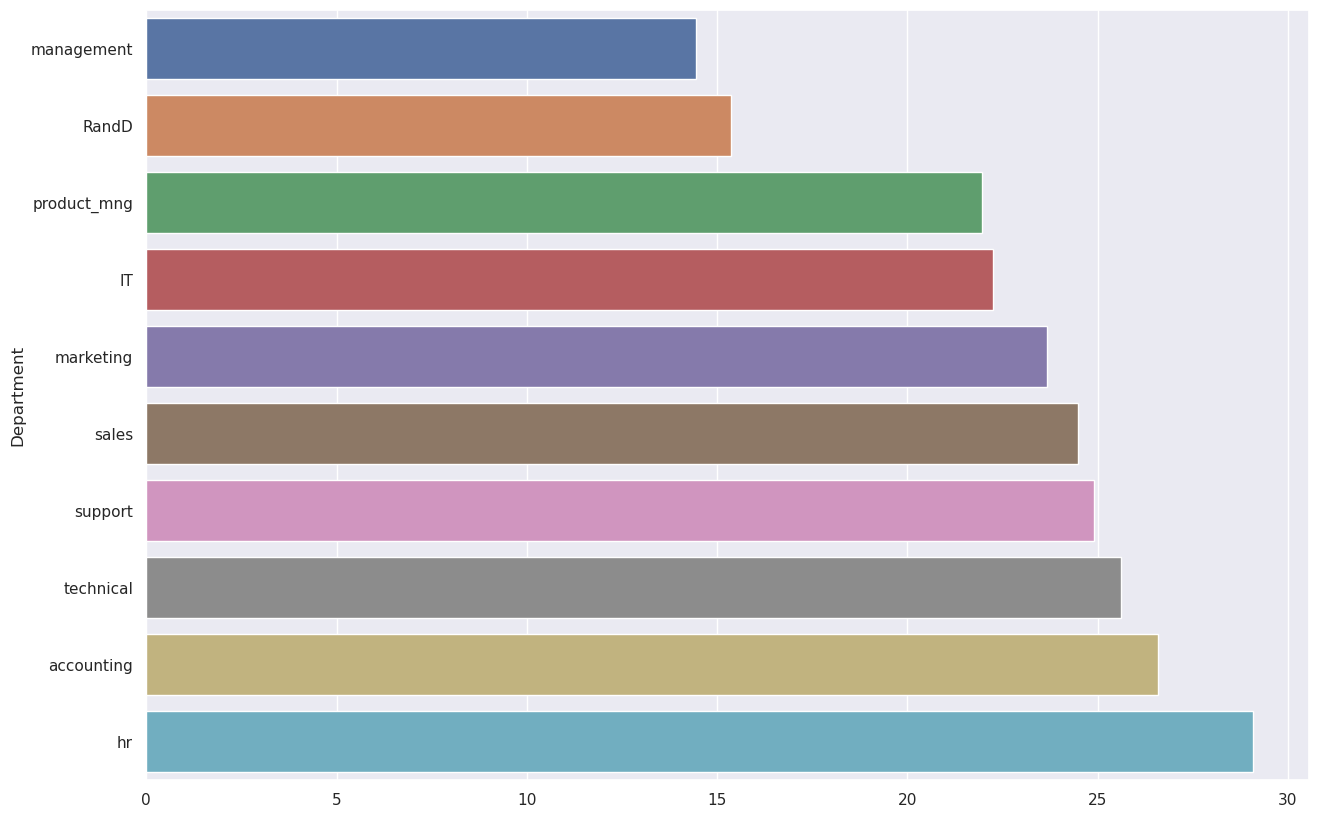

In [52]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(x=percentange_left,y=percentange_left.index,ax=ax)
plt.show()

HR Department saw the highest employee leaves and management department least

In [53]:
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [54]:
no_promotion = df[df['promotion_last_5years'] == 0]

In [58]:
no_promotion.shape

(14680, 10)

In [60]:
no_promotion.left.sum()/df.left.sum() *100

99.46793615233828

Majority of the people who left the firm where those who haven't recieved promotion in last 5 years

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

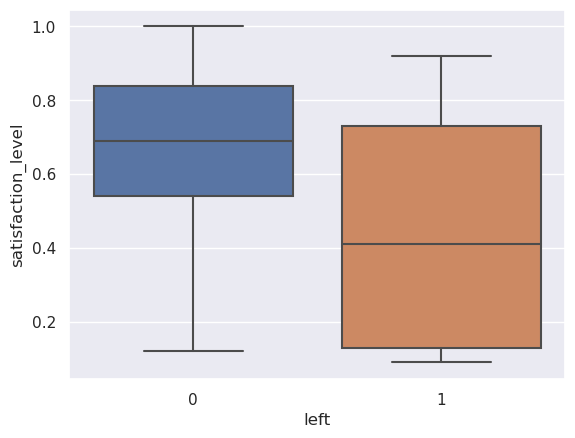

In [64]:
sns.boxplot(x='left',y='satisfaction_level',data=df,)

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

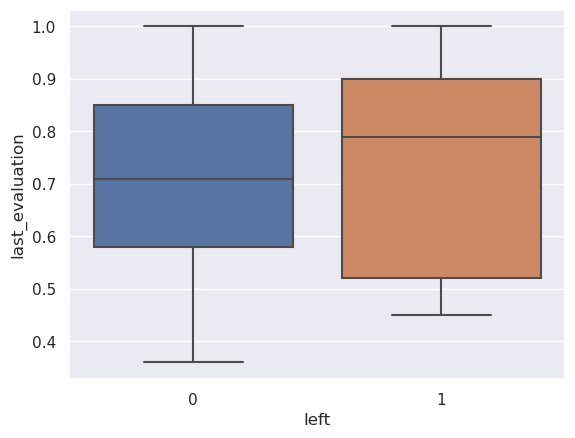

In [65]:
sns.boxplot(x='left',y='last_evaluation',data=df,)

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

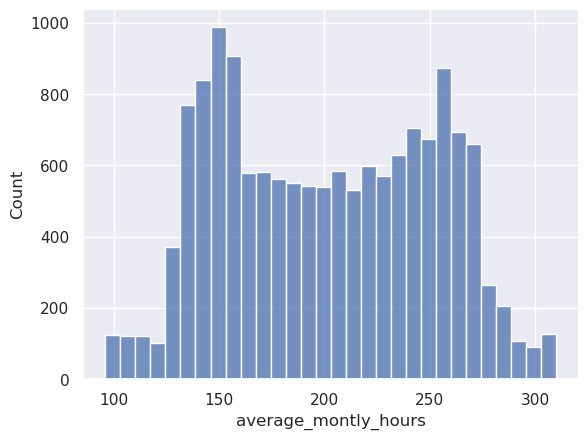

In [66]:
sns.histplot(data=df,x='average_montly_hours')

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

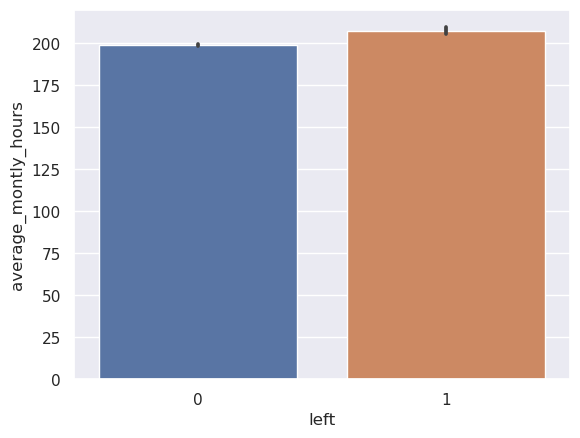

In [68]:
sns.barplot(data=df,x='left',y='average_montly_hours')

# Resampling